Задание: многостраничный отчет
Используя данные по активностям в парках Москвы
https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json
Создайте PDF отчет, в котором выведите:
1. Диаграмму распределения числа активностей по паркам, топ10 самых активных
2. Таблицу активностей по всем паркам в виде Активность-Расписание-Парк

NameOfPark
Парк Сокольники                                41
Парк Таганский (Основная территория)           18
Парк «Ходынское поле» (основная территория)    15
Воронцовский парк                              13
Парк «Фили»                                    13
Парк Победы на Поклонной горе                  13
Парк «Северное Тушино»                         10
Измайловский парк                               8
Сквер по Олонецкому проезду                     6
Сад культуры и отдыха имени Н.Э. Баумана        6
Name: CourseName, dtype: int64


True

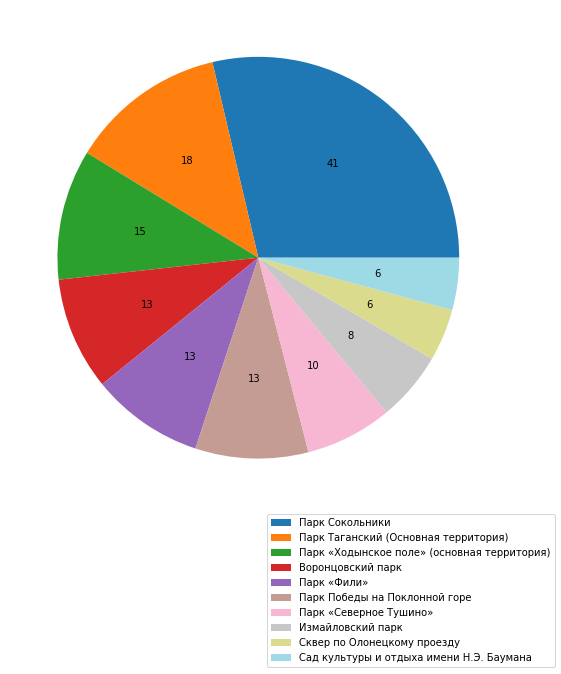

In [14]:
#%matplotlib inline

import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import binascii  # для преоб. изобр. из бинарного формата в текстовый
import pdfkit
from jinja2 import Template

r = requests.get("https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json")
data = pd.DataFrame(json.loads(r.content),
                   columns=["CourseName", "CoursesTimetable", "NameOfPark"]).fillna(value=0)


#1. Диаграмму распределения числа активностей по паркам, топ10 самых активных

data["NameOfPark"] = data["NameOfPark"].apply(lambda x: x.get('value'))
top10 = data.groupby("NameOfPark")["CourseName"].count().sort_values(ascending=False)[0:10]
print(top10)

fig = plt.figure(figsize=(9, 12))
area = fig.add_subplot(1, 1, 1)
total = sum(top10)
top10.plot.pie(ax=area, label="", labels=[""]*10, cmap="tab20", autopct=lambda x: int(round(total * x/100)))
plt.legend(top10.index, bbox_to_anchor=(1, 0, 0.1, 0))
plt.savefig("pie_top10_parks.png")  # сохранение отрисованной диаграммы
#plt.show()

# 2. Таблицу активностей по всем паркам в виде Активность-Расписание-Парк
# переименуем колонки
#CoursesTimetable - расписание, CourseName - активности, NameOfPark - парк
data.columns = ["Активность", "Расписание", "Парк"]

# подгрузим картинку в формате
with open('pie_top10_parks.png', 'rb') as file:
# преобразуем его в формат дата ури через base64 кодирование
    img = 'data:image/png;base64,' + binascii.b2a_base64(file.read(), newline=False).decode("UTF-8")
pd.set_option('display.max_colwidth', 1000)
html_template= '''<html><head>
    <title>Активности в парках Москвы</title>
    <meta charset="UTF-8"/>
</head>
<body>
<h1  align="center">Топ-10 парков по активностям</h1>
<img style="width:90%;margin-bottom:20%;" src="{{data.image}}" alt="Диаграмма топ-10 парков по активностям"/>
<h2 style="page-break-before:always">Таблица активностей в парках</h2>
{{data.table}}
</body>
</html>
'''
html = Template(html_template).render(data = {
    'image': img,
    'table': data.to_html() 
})
config = pdfkit.configuration(wkhtmltopdf="D:/wkhtmltopdf/bin/wkhtmltopdf.exe")
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'top10_parks_activity.total.pdf',
                   configuration=config, options=options)


<html><head>
    <title>Активности в парках Москвы</title>
    <meta charset="UTF-8"/>
</head>
<body>
<h1  align="center">Топ-10 парков по активностям</h1>

<h2 style="page-break-before:always">Таблица активностей в парках</h2>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Активность</th>
      <th>Расписание</th>
      <th>Парк</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Английский язык для детей</td>
      <td>Воскресенье, 16:00–17:00, 17:00–18:00</td>
      <td>Сад культуры и отдыха имени Н.Э. Баумана</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Киноклуб на английском языке</td>
      <td>Пятница, 20:30–22:00</td>
      <td>Сад культуры и отдыха имени Н.Э. Баумана</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Цигун на открытом воздухе</td>
      <td>Воскресенье, 14:00–16:00</td>
      <td>Сад культуры и отдыха имени Н.Э. Баумана</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Мас
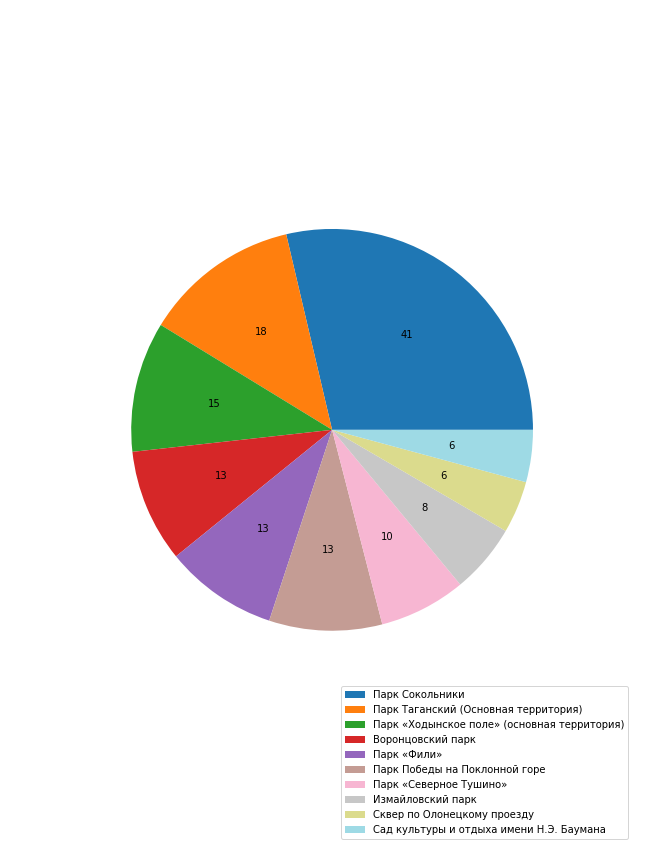

In [2]:
print(html)

In [152]:
# Сколько активностей Тайцзицюань есть в парках Москвы?
tay = data.groupby("Активность")["Парк"].count()
print(tay.loc["Тайцзицюань"])

1


In [11]:
with open("1.html", 'a', encoding='UTF-8') as f:
    f.write(html)

True

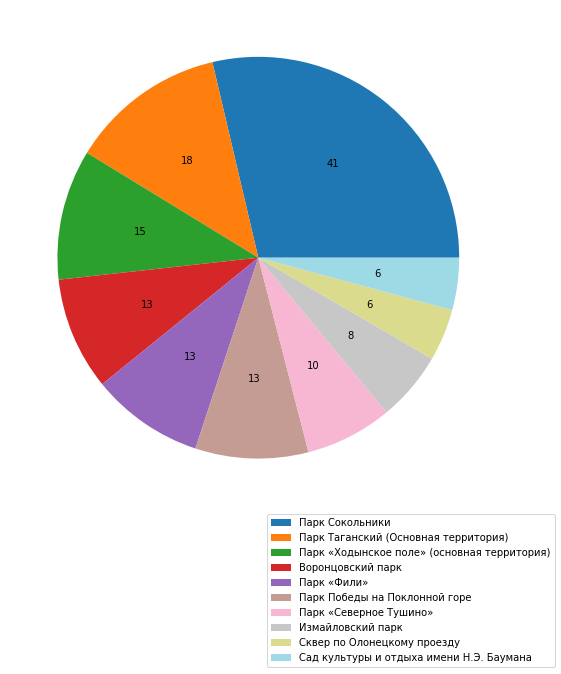

In [1]:
#%matplotlib inline

import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import binascii  # для преоб. изобр. из бинарного формата в текстовый
import pdfkit
from jinja2 import Template

r = requests.get("https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json")
data = pd.DataFrame(json.loads(r.content),
                   columns=["CourseName", "CoursesTimetable", "NameOfPark"]).fillna(value=0)


#1. Диаграмму распределения числа активностей по паркам, топ10 самых активных

data["NameOfPark"] = data["NameOfPark"].apply(lambda x: x.get('value'))
top10 = data.groupby("NameOfPark")["CourseName"].count().sort_values(ascending=False)[0:10]
#print(top10)

fig = plt.figure(figsize=(9, 12))
area = fig.add_subplot(1, 1, 1)
total = sum(top10)
top10.plot.pie(ax=area, label="", labels=[""]*10, cmap="tab20", autopct=lambda x: int(round(total * x/100)))
plt.legend(top10.index, bbox_to_anchor=(1, 0, 0.1, 0))
plt.savefig("pie_top10_parks.png")  # сохранение отрисованной диаграммы
#plt.show()

# 2. Таблицу активностей по всем паркам в виде Активность-Расписание-Парк
# переименуем колонки
#CoursesTimetable - расписание, CourseName - активности, NameOfPark - парк
data.columns = ["Активность", "Расписание", "Парк"]

# подгрузим картинку в формате
with open('pie_top10_parks.png', 'rb') as file:
# преобразуем его в формат дата ури через base64 кодирование
    img = 'data:image/png;base64,' + binascii.b2a_base64(file.read(), newline=False).decode("UTF-8")
pd.set_option('display.max_colwidth', 1000)
html_template= '''<html><head>
    <title>Активности в парках Москвы</title>
    <meta charset="UTF-8"/>
</head>
<body>
<h1  align="center">Топ-10 парков по активностям</h1>
<img style="width:90%;margin-bottom:20%;" src="{{data.image}}" alt="Диаграмма топ-10 парков по активностям"/>
<h2 style="page-break-before:always">Таблица активностей в парках</h2>
{{data.table}}
</body>
</html>
'''
html = Template(html_template).render(data = {
    'image': img,
    'table': data.to_html() 
})
config = pdfkit.configuration(wkhtmltopdf="D:/wkhtmltopdf/bin/wkhtmltopdf.exe")
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, '1top10_parks_activity.total.html',
                   configuration=config, options=options)